# InClassPractice1 


## Exploratory Data Analysis

. 

#### Write full names of your team members here
### TEAM 3

- Rupansh Phutela
- Anjali Sebastian
- Yesha Sharma

## Advertising data

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

A  dataset for your exploratory data analysis:  'Advertising.csv'  
you can either place the dataset in the same directory as your code or mention the path in the pd.read_csv()  function. 
df = pd.read_csv('./data/log.csv')


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy 
from scipy.stats.stats import pearsonr

# read CSV file stored in the current directory and save the results
data = pd.read_csv('Advertising.csv', skipinitialspace=True, index_col=0, parse_dates=True, infer_datetime_format=True)

# display the first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
2019-03-11,230.1,37.8,69.2,22.1
2019-03-12,44.5,39.3,45.1,10.4
2019-03-13,17.2,45.9,69.3,9.3
2019-03-14,151.5,41.3,58.5,18.5
2019-03-15,180.8,10.8,58.4,12.9


What are the features?
- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

What is the response?
- **Sales:** sales of a single product in a given market (in thousands of items)

What else do we know?
- Because the response variable is continuous, this is a **regression** problem.
- There are 200 **observations** (represented by the rows), and each observation is a single market.

In [2]:
#display all data. You can uncomment the code in the next line

display(data)
data.shape

,TV,Radio,Newspaper,Sales
2019-03-11,230.1,37.8,69.2,22.1
2019-03-12,44.5,39.3,45.1,10.4
2019-03-13,17.2,45.9,69.3,9.3
2019-03-14,151.5,41.3,58.5,18.5
2019-03-15,180.8,10.8,58.4,12.9
...,...,...,...,...
2019-09-22,38.2,3.7,13.8,7.6
2019-09-23,94.2,4.9,8.1,9.7
2019-09-24,177.0,9.3,6.4,12.8
2019-09-25,283.6,42.0,66.2,25.5


(200, 4)

##  Tasks

Create cells to solve each of the following problems. 

(1) For each field of the data, what is the mean of the data? What is the median? Are there any dataset has mode value? 

(2) For each field of the data, give the five-number summary, minimum, the first quartile (Q1), median, the third quartile (Q3), and maximum of the data.

(3) For each field of the data, visulize a boxplot of the data and compare it to your answer in (b). 

(4) For Sales, visualize distribution of the data using histogram. Comment on the data’s modality (i.e., bimodal, trimodal, etc.)

(5) For Sales, visualize the trend of the data over time using a graph. 

(6) For each pair (TV-Sales, Radio-Sales, Newspaper-Sales), visualize scatter graph.


In [3]:
#  you can use functions such as mean(), max()

In [4]:
#(part1) For each field of the data, what is the mean of the data? What is the median? Are there any dataset has mode value?
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Note: 
- The Mean values for TV, Radio, Newspaper, Sales are as follows: 147.042500, 23.264000, 30.554000, 14.022500
- The Median Values are: 149.750000,	22.900000,	25.750000,	12.900000
    

In [5]:
# for mode usinf mode function
# mode function does not work with NaN values so we can get the mode either by droping/filling or impute valiues
data.mode(axis=0, numeric_only=False, dropna=True)

,TV,Radio,Newspaper,Sales
0,17.2,4.1,8.7,9.7
1,76.4,5.7,9.3,NaN
2,109.8,NaN,25.6,NaN
3,177.0,NaN,NaN,NaN
4,184.9,NaN,NaN,NaN
5,197.6,NaN,NaN,NaN
6,199.8,NaN,NaN,NaN
7,222.4,NaN,NaN,NaN
8,237.4,NaN,NaN,NaN
9,240.1,NaN,NaN,NaN


Note: 
- Mode: Yes the dataset has mode values
- Sales has 1 Mode value at 9.7
- Radio has 2 Mode values at 4.1 and 5.7
- Newspaper has three

In [6]:
#(part 2) For each field of the data, give the five-number 
#  minimum, the first quartile (Q1), median, the third quartile (Q3), and maximum of the data.
# quartiles can be calculated by   quantile( percent)  

In [7]:
 data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


 Note:
 - Minimums for TV	Radio	Newspaper	Sales are: 0.700000,	0.000000,	0.300000,	1.600000
 - Q1 for TV	Radio	Newspaper	Sales are: 74.375000,	9.975000,	12.750000,	10.375000
 - Q2 for TV	Radio	Newspaper	Sales are: 149.750000,	22.900000,	25.750000,	12.900000 
 - Q3 for TV	Radio	Newspaper	Sales are: 218.825000,	36.525000,	45.100000,	17.400000
 - Maximum for TV	Radio	Newspaper	Sales are: 296.400000,	49.600000,	114.000000,	27.000000
 

In [8]:
#(part 3) For each field of the data, visulize a boxplot of the data and compare it to your answer in (b). 
# The data points from problem number 2 forms the five points on the box plot for each field.
# we can use boxplot() function.  data['TV'] is one column of the dataset and its boxplot can be shown
# We should show all three boxplots. 

[Text(0.5, 1.0, 'Boxplot of Newspaper and Sales')]

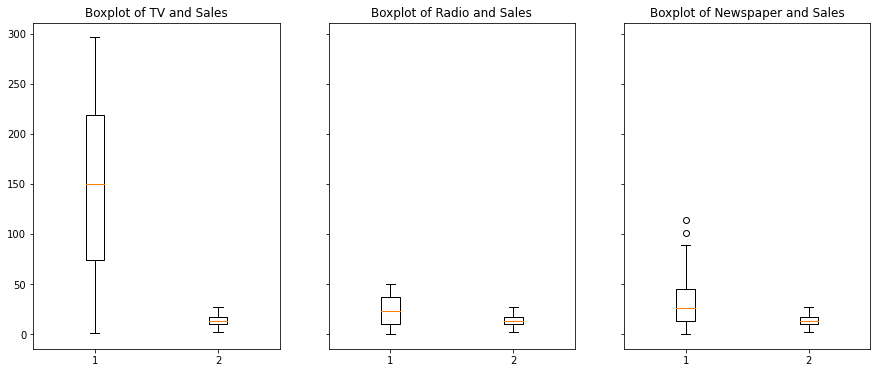

In [9]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(15, 6),sharey=True)
ax1.boxplot(data[["TV","Sales"]])
ax2.boxplot(data[["Radio","Sales"]])
ax3.boxplot(data[["Newspaper","Sales"]])
ax1.set(title = "Boxplot of TV and Sales")
ax2.set(title = "Boxplot of Radio and Sales")
ax3.set(title = "Boxplot of Newspaper and Sales")

Note: eg : TV
- values plotted in boxplot match the values in 2.
- First quartile/25th Percentile = 74.375
- Second quartile/50th Percentile = 149.75
- Third quartile/75th Percentile = 218.825000
- min - 0.700000
- max - 296.400000

Similarly we interpret the same for other categories

#### There are 2 outliers in newspaper. (i.e. values that are greater than Q3 +1.5IQR or less than Q1` +1.5IQR)



In [10]:
#(part 4) For Sales, visualize distribution of the data using histogram. Comment on the data’s modality (i.e., bimodal, trimodal, etc.)
#  you can use   fig, ax1= plt.subplots(1,1)  which creates fig and axis tuple. Then use  ax1.hist(  )   for the sales data


[Text(0.5, 1.0, 'Histogram of Sales')]

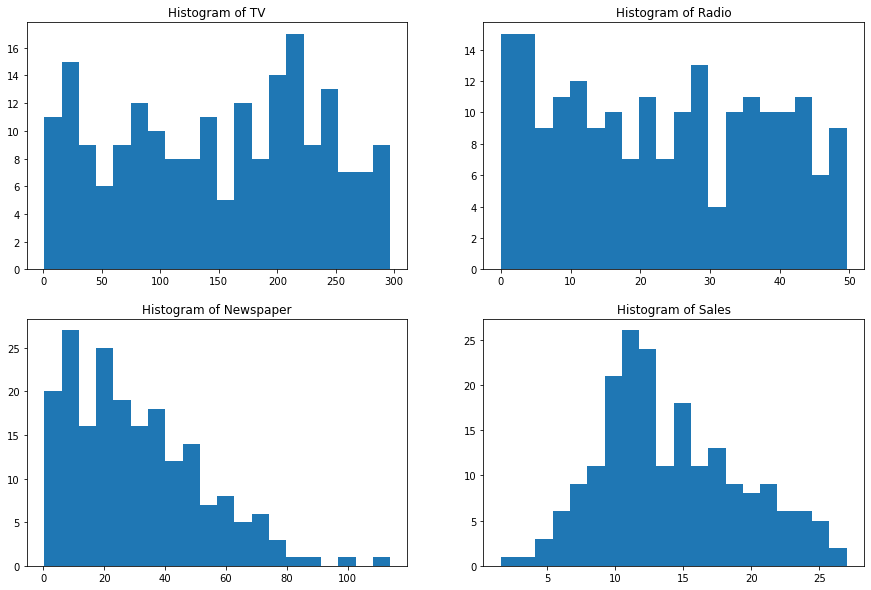

In [11]:
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2, 2, figsize=(15, 10))
ax1.hist(data["TV"],bins=20)
ax2.hist(data["Radio"],bins=20)
ax3.hist(data["Newspaper"],bins=20)
ax4.hist(data["Sales"],bins=20)
ax1.set(title = "Histogram of TV")
ax2.set(title = "Histogram of Radio")
ax3.set(title = "Histogram of Newspaper")
ax4.set(title = "Histogram of Sales")

Notes:
- For TV we can see that the distribution is multimodal
- For Radio we can see that the distribution is multimodal
- For Newspaper we see that it looks uni-modal with right skewed distribution
- For Sales we see that it looks uni-modal with very little right skew (almost normal) distribution

In [12]:
#(part 5) For Sales, visualize the trend of the data over time using a graph. 
#  Also label the axis using  plt.xlabel()   plt.ylabel()   and  plt.title()


In [13]:
data_sort = data.sort_index(ascending = True)
data_sort.head()

,TV,Radio,Newspaper,Sales
2019-03-11,230.1,37.8,69.2,22.1
2019-03-12,44.5,39.3,45.1,10.4
2019-03-13,17.2,45.9,69.3,9.3
2019-03-14,151.5,41.3,58.5,18.5
2019-03-15,180.8,10.8,58.4,12.9


In [14]:
data_sort.tail()

,TV,Radio,Newspaper,Sales
2019-09-22,38.2,3.7,13.8,7.6
2019-09-23,94.2,4.9,8.1,9.7
2019-09-24,177.0,9.3,6.4,12.8
2019-09-25,283.6,42.0,66.2,25.5
2019-09-26,232.1,8.6,8.7,13.4


[Text(0.5, 1.0, 'Sales History'),
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Sales in (thousands of items)')]

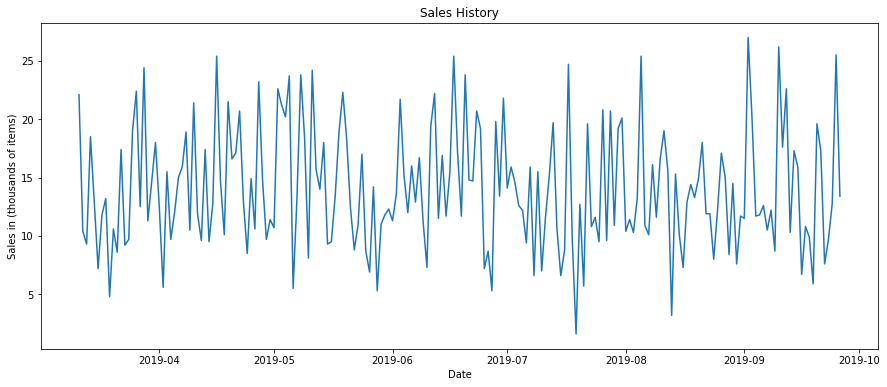

In [15]:
fig, ax = plt.subplots(1,1,figsize=(15,6)) 
ax.plot(data_sort.index,data_sort["Sales"])
ax.set(title = "Sales History", xlabel = "Date",ylabel = "Sales in (thousands of items)")

In [16]:
data_sort['Sales_Cum']=data_sort['Sales'].cumsum(axis = 0) 
data_sort.tail()

,TV,Radio,Newspaper,Sales,Sales_Cum
2019-09-22,38.2,3.7,13.8,7.6,2743.1
2019-09-23,94.2,4.9,8.1,9.7,2752.8
2019-09-24,177.0,9.3,6.4,12.8,2765.6
2019-09-25,283.6,42.0,66.2,25.5,2791.1
2019-09-26,232.1,8.6,8.7,13.4,2804.5


[Text(0.5, 1.0, 'Cumulative Sales History'),
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Cumulative Sales in (thousands of items)')]

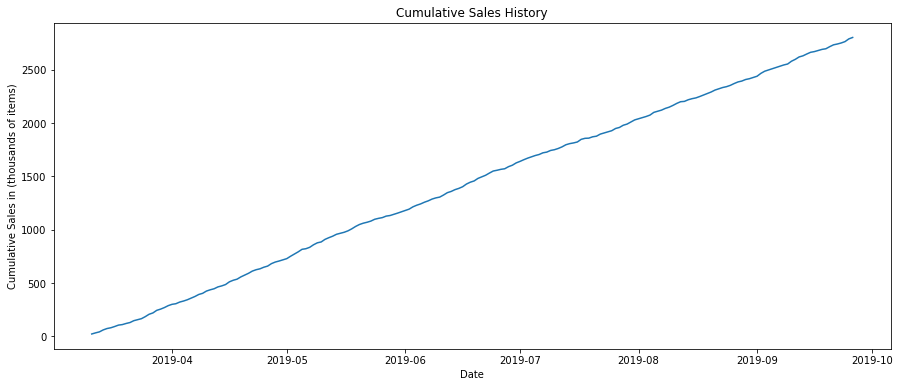

In [17]:
fig, ax = plt.subplots(1,1,figsize=(15,6)) 
ax.plot(data_sort.index,data_sort["Sales_Cum"])
ax.set(title = "Cumulative Sales History", xlabel = "Date",ylabel = "Cumulative Sales in (thousands of items)")

In [18]:
#(6) For each pair (TV-Sales, Radio-Sales, Newspaper-Sales), visualize scatter graph.
#  you can use  scatter( x, y  )   where for x use one data column and for y use the other data. Then
# we can use plt.xlabel() and plt.ylabel()   we can label what the scatter plot is for.  

[Text(0.5, 1.0, 'Scatter plot of Newspaper and Sales')]

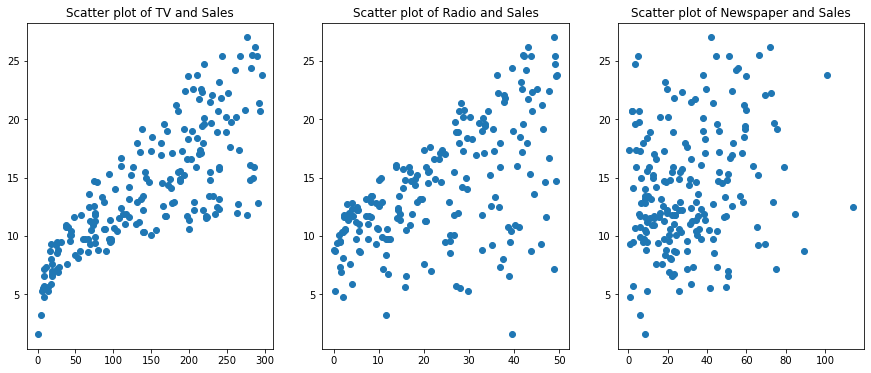

In [19]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(15, 6))
ax1.scatter(data["TV"],data["Sales"])
ax2.scatter(data["Radio"],data["Sales"])
ax3.scatter(data["Newspaper"],data["Sales"])
ax1.set(title = "Scatter plot of TV and Sales")
ax2.set(title = "Scatter plot of Radio and Sales")
ax3.set(title = "Scatter plot of Newspaper and Sales")

## Part 2
Write a summary of what you find from the data

- First we carried out basic descriptive analysis of the data that included the five number summary and the mode of the data using the .describe() and the .mode() methods. Here we noticed that the standard deviation for TV ads is the maximum and therefore we expect that the data to be more spread out for this feature. 
- The Boxplot found the Min,Max,the three quartiles and the outlier (1.5X). There are two outliers in the newspaper feature. Since we used the same y-axis for all boxplots we can confirm the spread of data in TV ads.
- Next we visualized the frequency of the data using histograms which shows the modality and skewness of data.Our observations are as follows.
    - For TV we can see that the distribution is multimodal
    - For Radio we can see that the distribution is multimodal
    - For Newspaper we see that it looks uni-modal with right skewed distribution
    - For Sales we see that it looks uni-modal with very little right skew (almost normal) distribution
- We visualized the time-series relationship for sales from March to end September in 2019. The sales fluctuates during this period but there is no trend we can see here.
- We visualized the correlation between TV, Radio and Newspaper ads and their impact on sales volume using scatter plots. Looking at the scatter plots we see that TV-sales appears to to be more linearly correlated. Therefore if we were to build a linear regression model to predict Sales: TV advertisements would be the most important feature.  

### Some of the resources are 

#### Boxplot
https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51


- matplotlib.pyplot boxplot demo
https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html


#### matplotlib.pyplot
- scatter plot
https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.scatter.html


- histogram plot
https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.hist.html


#### pandas DataFrame
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html


- describe()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html


- corr()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html


- hist()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html


- plot.scatter()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html


- pivot()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html